# DS-SF-30 | Unit Project 2: Exploratory Data Analysis

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our our first modeling exercise in Unit Project 3.

First, load the python libraries you will need for this project:

In [20]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

%matplotlib inline
plt.style.use('ggplot')

Then, read in your dataset:

In [2]:
df = pd.read_csv(os.path.join('..', '..', 'dataset', 'dataset-ucla-admissions.csv'))

df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


## Questions

> ### Question 1.  How many observations are in our dataset?

In [4]:
# TODO
df.shape

(400, 4)

Answer:400

> ### Question 2.  Create a summary table.

In [21]:
np.round(df.describe(),2)

,admit,gre,gpa,prestige
count,400.00,398.00,398.00,399.00
mean,0.32,588.04,3.39,2.49
std,0.47,115.63,0.38,0.95
min,0.00,220.00,2.26,1.00
25%,0.00,NaN,NaN,NaN
50%,0.00,NaN,NaN,NaN
75%,1.00,NaN,NaN,NaN
max,1.00,800.00,4.00,4.00


> ### Question 3.  Why would `gre` have a larger variance than `gpa`?

In [27]:
df.var()

admit           0.217237
gre         13369.953040
gpa             0.144879
prestige        0.893654
dtype: float64

Answer:gre is on a different scale that has a much larger range of values (800 max vs. 4 max, and 220 min vs. 2.26 min)

> ### Question 4.  Drop data points with missing data.

In [28]:
# TODO
df.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

In [29]:
df.dropna().shape[0]

397

In [31]:
df.isnull().sum()

admit       0
gre         2
gpa         2
prestige    1
dtype: int64

In [33]:
df = df.dropna()

> ### Question 5.  Confirm that you dropped the correct data.  How can you tell?

In [34]:
# TODO
df.isnull().sum()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

In [35]:
df.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

Answer:We now have no more null values in our new dataframe

> ### Question 6.  Create boxplots for `gre` and `gpa`.

C:\Users\Chad\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  from ipykernel import kernelapp as app


{'boxes': [<matplotlib.lines.Line2D at 0xc60c748>],
 'caps': [<matplotlib.lines.Line2D at 0xc61b470>,
 'fliers': [<matplotlib.lines.Line2D at 0xc629518>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xc61bf60>],
 'whiskers': [<matplotlib.lines.Line2D at 0xc344ac8>,
  <matplotlib.lines.Line2D at 0xc60ceb8>]}

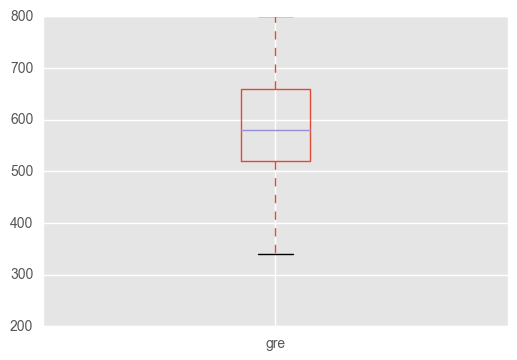

In [37]:
# TODO
df[ ['gre'] ].boxplot(figsize = (8, 8))

C:\Users\Chad\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  from ipykernel import kernelapp as app


{'boxes': [<matplotlib.lines.Line2D at 0xc1a9f98>],
 'caps': [<matplotlib.lines.Line2D at 0xc1bccc0>,
 'fliers': [<matplotlib.lines.Line2D at 0xc5255f8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xc5259e8>],
 'whiskers': [<matplotlib.lines.Line2D at 0xc2b13c8>,
  <matplotlib.lines.Line2D at 0xc1bc748>]}

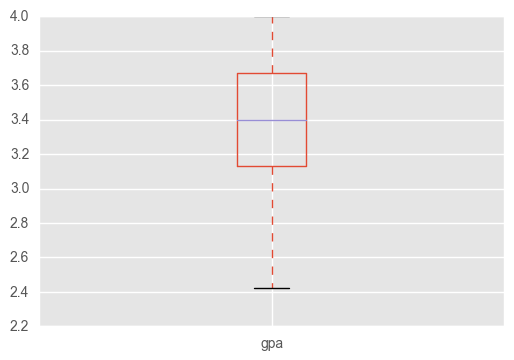

In [36]:
# TODO
df[ ['gpa'] ].boxplot(figsize = (8, 8))

> ### Question 7.  What do boxplots show?

Answer:both box plots are relatively tall, indicating students had a large range of scores for both gre and gpa. For gre, the scores appear to be relatively evenly distributed between the upper and lower whiskers. For gpa, the median as well as both quartiles are located closer to the upper whisker, indicating that the majority of the students scored on the higher end of the box plot range. 

> ### Question 8.  Plot the distribution of each variable.

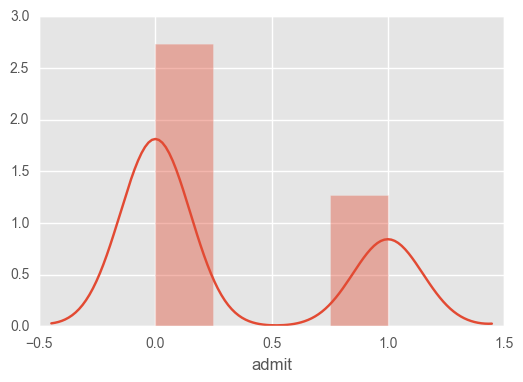

In [38]:
# TODO
sns.distplot(df['admit'])

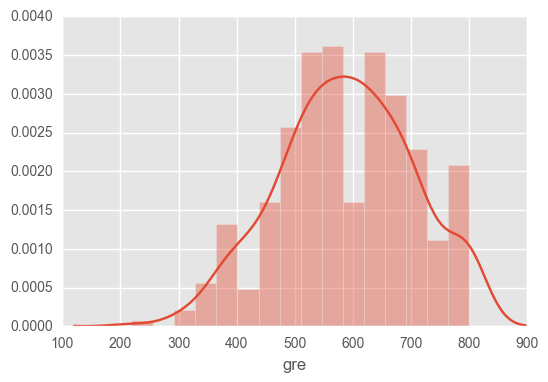

In [39]:
# TODO
sns.distplot(df['gre'])

In [ ]:
# TODO

In [ ]:
# TODO

> ### Question 9.  If our model had an assumption of a normal distribution for `gre` and `gpa`, would we meet that requirement?  Would their distributions need correction?  If so, why, why not?  How?

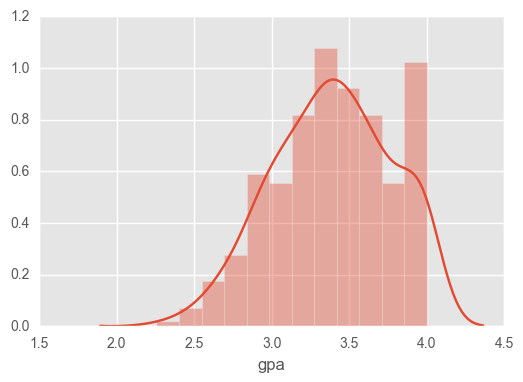

In [40]:
# TODO
sns.distplot(df['gpa'])

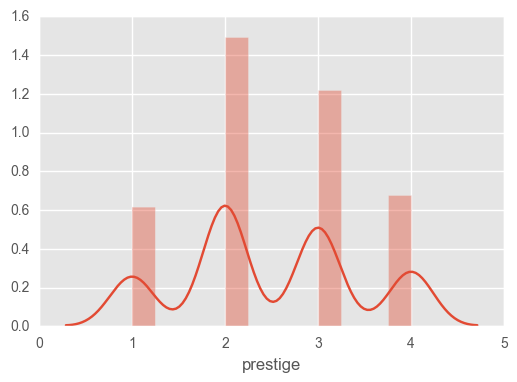

In [41]:
# TODO
sns.distplot(df['prestige'])

Answer:

> ### Question 10.  Create a correlation matrix for the dataset

In [42]:
# TODO
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


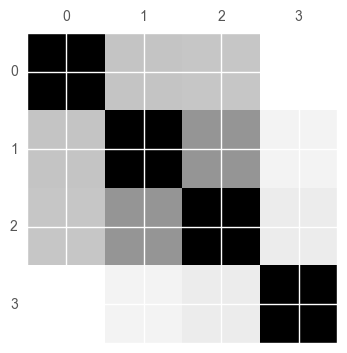

In [44]:
plt.matshow(df.corr())

> ### Question 11.  What did you find?  Which of our variables are potentially colinear?

    Answer:gre and gpa are potentially colinear.

> ### Question 12.  Write an analysis plan for exploring the association between graduate school admission rates and prestige of undergraduate schools.

Answer: create a scatter plot and frequency table to further visualize teh correlation between gre and gpa

> ### Question 13.  What is your hypothesis?

Answer: Using gpa scores, we will be able to predict gre scores